# ISMRM2021

# Simulation Configs

- *n* = 10000 Signals
- *Std* = 0.1
- *Model*: s(b)/s(0) = (1-f)*exp(-bD)+ f*exp(-bD*)
- *Params*: **D** - Diffusion Coefficient, **D*** - Pseudodiffusion Coefficient and **f** - Perfusion Fraction 
- *Params Values*: **D** = 0.00081, **D*** = 0.022 and **f** = 0.1 Mean values of Gray Matter from doi:10.2463/mrms.mp.2019-0061

## Linear Algorithm
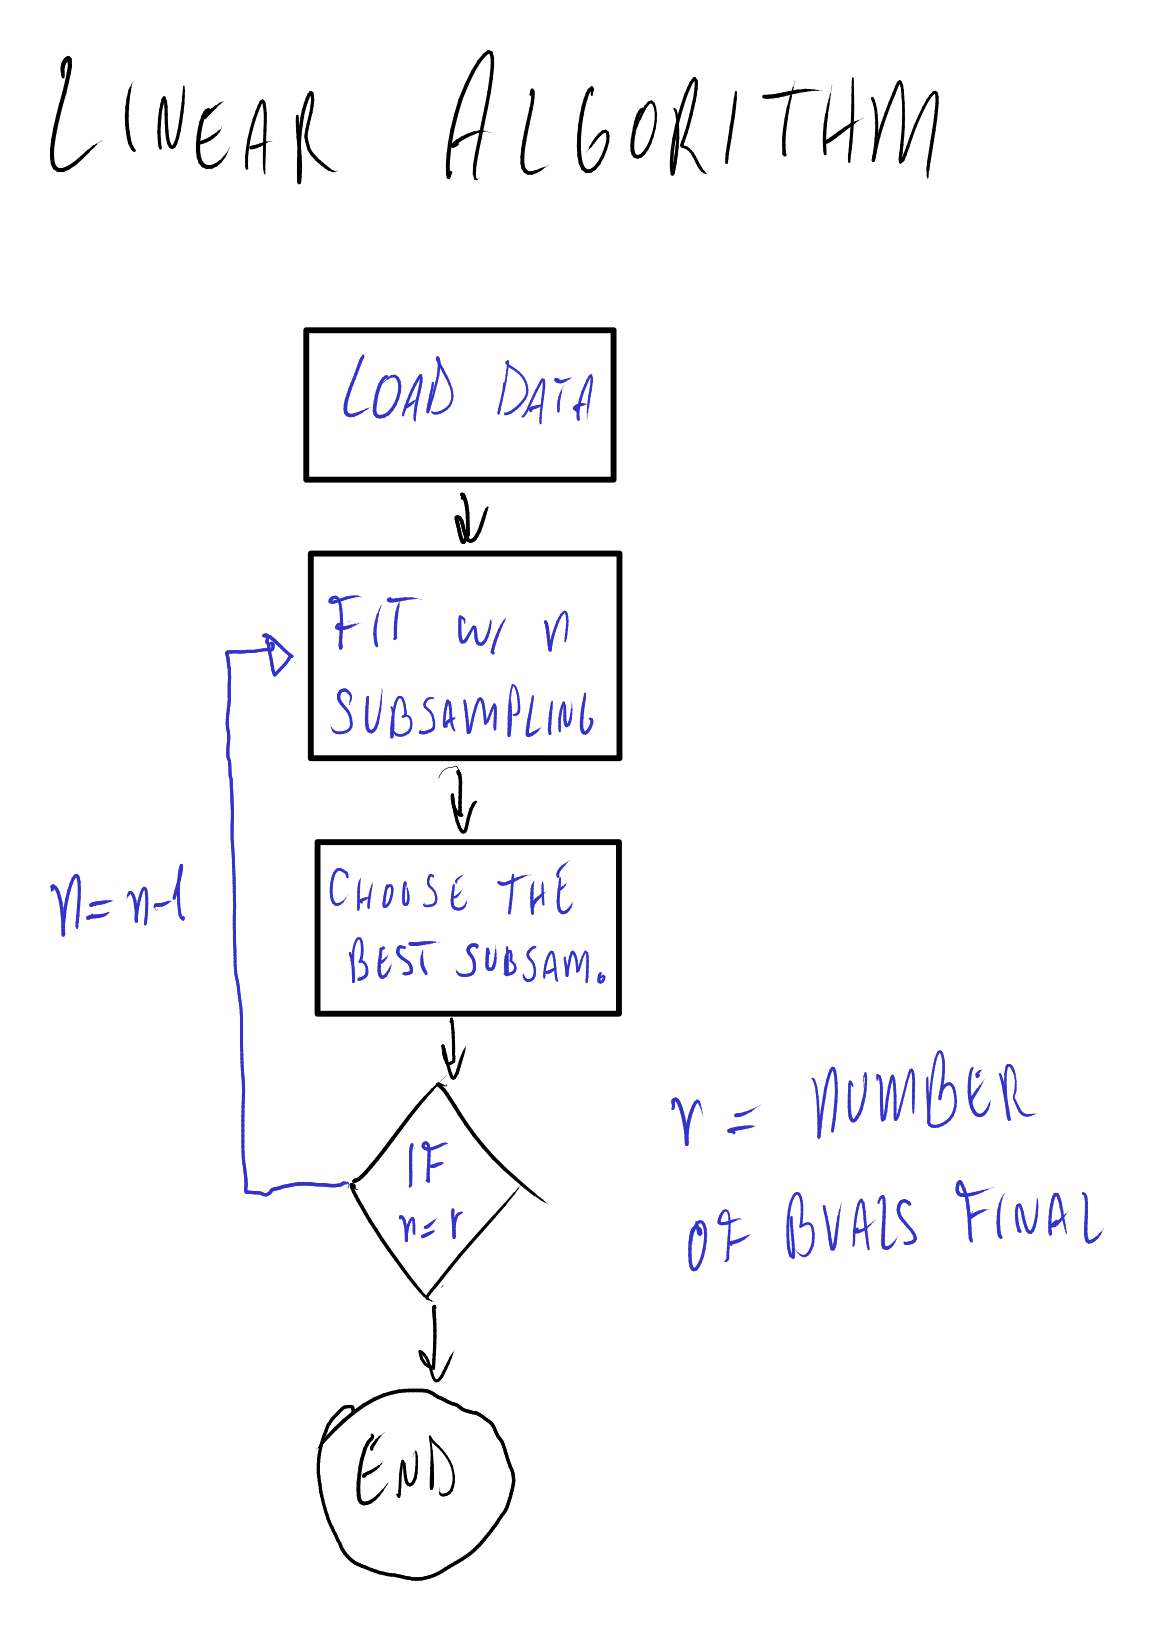

## Combinatory Algorithm

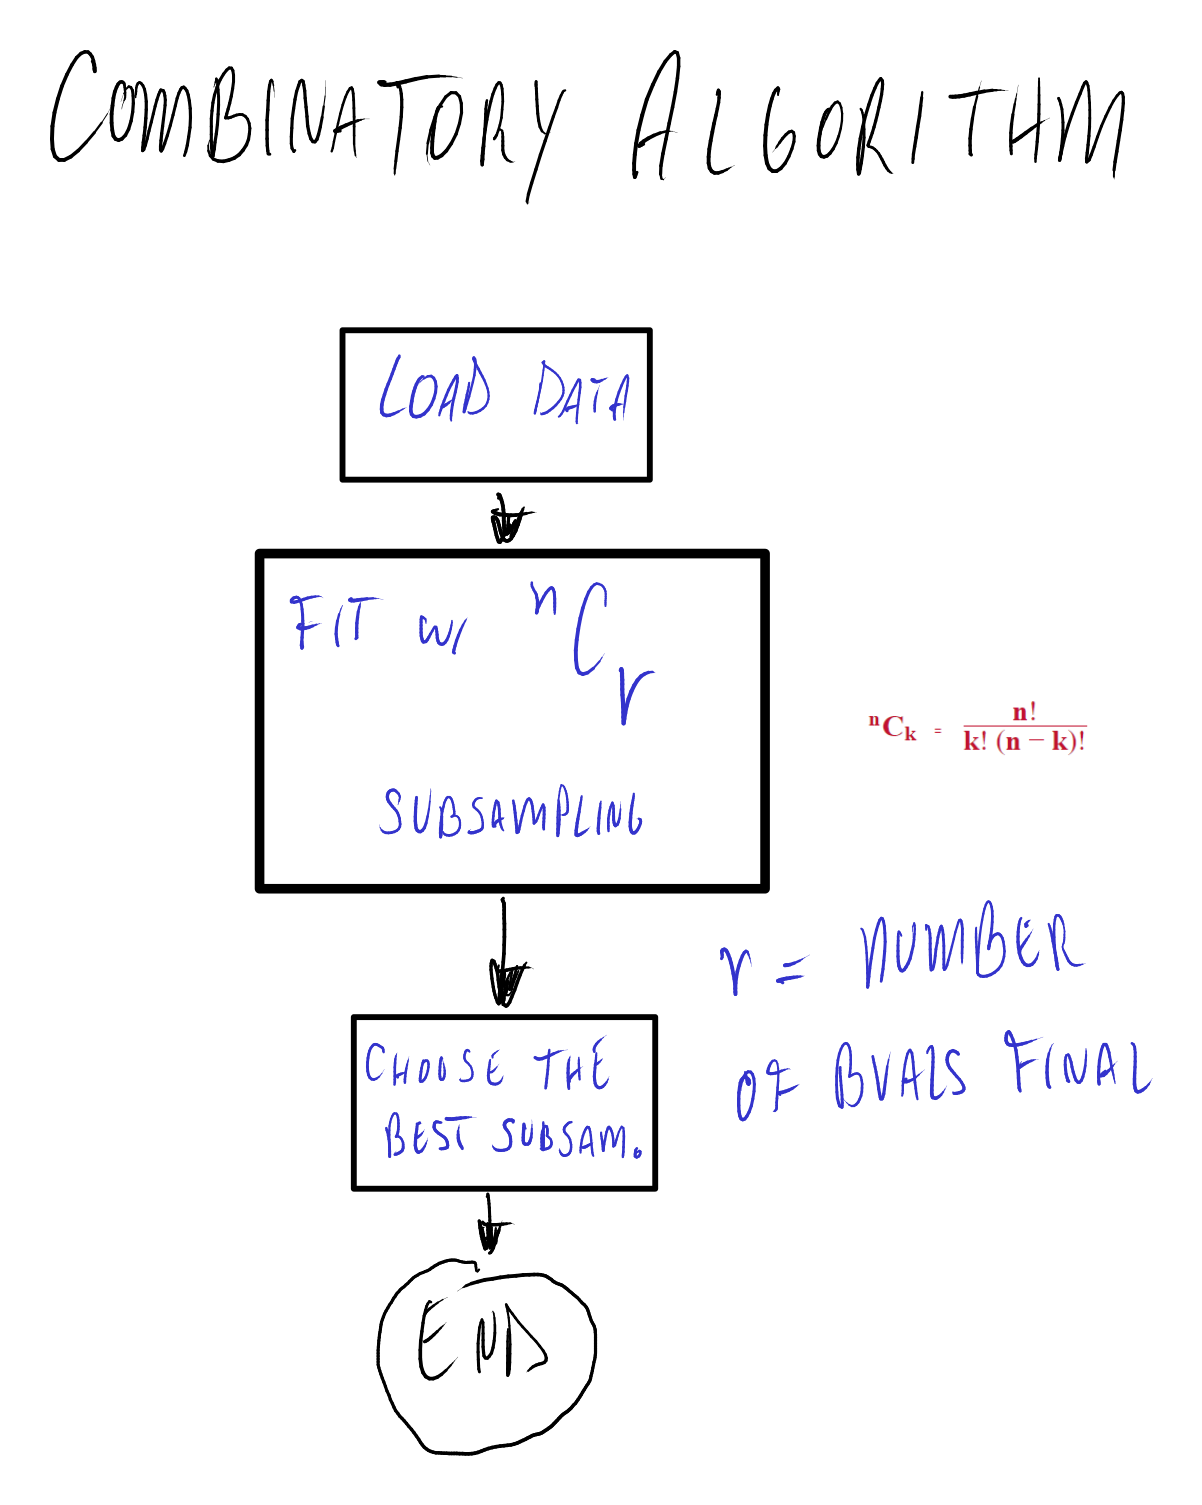

### Examples:

- For the reduction of 14 bvals to 9 bvals (b = 0 is a common b-value), we have:
- Linear Algorithm: (14+13+12+11+10) = 60 iterations (60 fittings with different b-values samplings)
- Combinatory Algorithm: $\frac{14!}{9!(14-9)!}$ = 2002 iterations

# Code

In [1]:
# Importing Linear and Combinatory Algorithm
from algorithms.algorithms import linear_reduction, combinatory_reduction

# Import Simulation Modules
import numpy as np

# Simulation
def simul_signal4d(params_mean, std, shape, bvals):
    """ 4D Matrix are equivalent to a real image .nii
    """

    d_mean, pd_mean, f_mean = params_mean
    data = np.zeros((shape[0],shape[1],shape[2],shape[3]))
    signal = (1-f_mean)*np.exp(-bvals*d_mean)+f_mean*np.exp(-bvals*pd_mean)
    
    for i in range(shape[0]):
            for j in range(shape[1]):
                    for k in range(shape[2]):
                        noise = np.random.normal(1, std, len(signal))
                        data[i,j,k,:] = signal+(signal*noise)
    return data

# Simulations Configs
params_mean = [0.00081, 0.022, 0.1] # Mean values of Gray Matter from doi:10.2463/mrms.mp.2019-0061
bvals = np.array([0, 4, 8, 16, 30, 60, 120, 250, 500,
                  1000, 1200, 1400, 1600, 1800, 2000]) # The algorithm will ignore the bvalue = 0.
std = 0.1 
n = 5 # = n-r (number of reduced b-values)

shape = [100,100,1,len(bvals)] # 4D matrix 100x100x1x15 bvals - 10 000 "voxels".

# Create a simulate signal
sig = simul_signal4d(params_mean, std, shape, bvals)

# RUN LINEAR ALGORITHM - Rsquared
best_bvals = linear_reduction(n, bvals, sig)

print(best_bvals)

100%|███████████████████████████████████████████| 60/60 [00:21<00:00,  2.81it/s]

[30, 60, 120, 250, 1200, 1400, 1600, 1800, 2000]


In [2]:
# RUN COMBINATORY ALGORITHM - Rsquared
best_bvals = combinatory_reduction(n, bvals, sig)

print(best_bvals)

100%|███████████████████████████████████████| 2002/2002 [12:31<00:00,  2.66it/s]

[4, 8, 60, 1000, 1200, 1400, 1600, 1800, 2000]


In [3]:
# Replicate with std = 0.25
std = 0.25
sig = simul_signal4d(params_mean, std, shape, bvals)

# RUN LINEAR ALGORITHM - Rsquared
best_bvals = linear_reduction(n, bvals, sig)

print(best_bvals)

# RUN COMBINATORY ALGORITHM - Rsquared
best_bvals = combinatory_reduction(n, bvals, sig)

print(best_bvals)

100%|███████████████████████████████████████████| 60/60 [00:22<00:00,  2.64it/s]


[30, 60, 120, 250, 1200, 1400, 1600, 1800, 2000]


100%|███████████████████████████████████████| 2002/2002 [13:01<00:00,  2.56it/s]

[4, 16, 30, 1000, 1200, 1400, 1600, 1800, 2000]


In [ ]:
# Codeberg Repository: https://codeberg.org/lcscosta/Ithaca

In [7]:
# Simulations Configs
params_mean = [0.00081, 0.022, 0.1] # Mean values of Gray Matter from doi:10.2463/mrms.mp.2019-0061
bvals = np.array([0, 4, 8, 16, 30, 60, 120, 250, 500,
                  1000, 1200, 1400, 1600, 1800, 2000]) # The algorithm will ignore the bvalue = 0.
std = 0.1 
n = 5 # = n-r (number of reduced b-values)

shape = [100,100,1,len(bvals)] # 4D matrix 100x100x1x15 bvals - 10 000 "voxels".

# Create a simulate signal
sig = simul_signal4d(params_mean, std, shape, bvals)

# RUN LINEAR ALGORITHM - Rsquared
best_bvals = linear_reduction(n, bvals, sig)

print(best_bvals)

100%|███████████████████████████████████████████| 60/60 [00:22<00:00,  2.69it/s]

[30, 60, 120, 250, 1200, 1400, 1600, 1800, 2000]


In [8]:
# Simulations Configs
params_mean = [0.00081, 0.022, 0.1] # Mean values of Gray Matter from doi:10.2463/mrms.mp.2019-0061
bvals = np.array([0, 4, 8, 16, 30, 60, 120, 250, 500,
                  1000, 1200, 1400, 1600, 1800, 2000]) # The algorithm will ignore the bvalue = 0.
std = 0.1 
n = 5 # = n-r (number of reduced b-values)

shape = [100,100,1,len(bvals)] # 4D matrix 100x100x1x15 bvals - 10 000 "voxels".

# Create a simulate signal
sig = simul_signal4d(params_mean, std, shape, bvals)

# RUN LINEAR ALGORITHM - Rsquared
best_bvals = linear_reduction(n, bvals, sig)

print(best_bvals)

100%|███████████████████████████████████████████| 60/60 [00:22<00:00,  2.67it/s]

[30, 60, 120, 250, 1200, 1400, 1600, 1800, 2000]
